# Description
1. Import data
2. Replaced Nan and removed unnecessary columns (later found ot, that PassengerId is important :D)
3. Created categorical values
4. Created title category, I thought it would be a more enhanced way to check if title meant priority while fleeing
5. Created fare and age category, to make it easier for the decision trees
6. Specified model features
7. Tried to bruteforce my way through the max_depth and n_estimators (did not work out...)
8. Created assingment

In [153]:
# Reading data

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

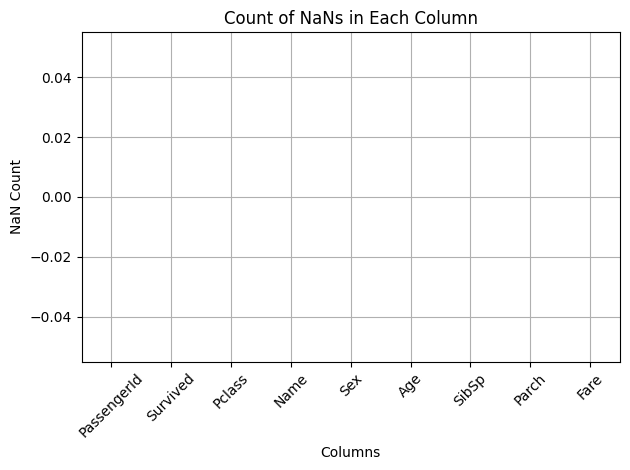

In [154]:
# Replacing Nans
import matplotlib.pyplot as plt

def plot_nan_counts(train_data):
    # Calculate the number of NaNs in each column
    nan_counts = train_data.isna().sum()

    # Plot the results
    nan_counts.plot(kind='bar', color='skyblue')
    plt.title('Count of NaNs in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('NaN Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
    plt.show()

if train_data.isna().sum().sum() > 0:
    train_data = train_data.drop(columns="Cabin")
    train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
    train_data['Embarked'] = train_data['Embarked'].fillna('U')

    #Dropping irrelevant
    train_data.drop('Ticket', axis=1, inplace=True)
    train_data.drop('Embarked', axis=1, inplace=True)

if test_data.isna().sum().sum() > 0:
    test_data = test_data.drop(columns="Cabin")
    test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
    test_data['Embarked'] = test_data['Embarked'].fillna('U')

    #Dropping irrelevant
    test_data.drop('Ticket', axis=1, inplace=True)
    test_data.drop('Embarked', axis=1, inplace=True)

plot_nan_counts(train_data)

In [155]:
# Creating titles
train_data[['Last_name', 'temp']] = train_data['Name'].str.split(', ', expand=True)

# Further split the 'temp' column on the first dot to separate the title and first name
train_data['Title'] = train_data['temp'].str.extract(r'(\w+\.)')
train_data['First_name'] = train_data['temp'].str.replace(r'\w+\. ', '', regex=True)

train_data.drop('temp', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)

# Creating titles
test_data[['Last_name', 'temp']] = test_data['Name'].str.split(', ', expand=True)

# Further split the 'temp' column on the first dot to separate the title and first name
test_data['Title'] = test_data['temp'].str.extract(r'(\w+\.)')
test_data['First_name'] = test_data['temp'].str.replace(r'\w+\. ', '', regex=True)

test_data.drop('temp', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Last_name,Title,First_name
0,1,0,3,male,22.0,1,0,7.2500,Braund,Mr.,Owen Harris
1,2,1,1,female,38.0,1,0,71.2833,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,7.9250,Heikkinen,Miss.,Laina
3,4,1,1,female,35.0,1,0,53.1000,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,8.0500,Allen,Mr.,William Henry
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,Montvila,Rev.,Juozas
887,888,1,1,female,19.0,0,0,30.0000,Graham,Miss.,Margaret Edith
888,889,0,3,female,28.0,1,2,23.4500,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0,0,30.0000,Behr,Mr.,Karl Howell


In [156]:
# Total family
train_data["Familiy_count"] = train_data["SibSp"] + train_data["Parch"]
test_data["Familiy_count"] = test_data["SibSp"] + test_data["Parch"]

train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Last_name,Title,First_name,Familiy_count
0,1,0,3,male,22.0,1,0,7.2500,Braund,Mr.,Owen Harris,1
1,2,1,1,female,38.0,1,0,71.2833,Cumings,Mrs.,John Bradley (Florence Briggs Thayer),1
2,3,1,3,female,26.0,0,0,7.9250,Heikkinen,Miss.,Laina,0
3,4,1,1,female,35.0,1,0,53.1000,Futrelle,Mrs.,Jacques Heath (Lily May Peel),1
4,5,0,3,male,35.0,0,0,8.0500,Allen,Mr.,William Henry,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,Montvila,Rev.,Juozas,0
887,888,1,1,female,19.0,0,0,30.0000,Graham,Miss.,Margaret Edith,0
888,889,0,3,female,28.0,1,2,23.4500,Johnston,Miss.,"Catherine Helen ""Carrie""",3
889,890,1,1,male,26.0,0,0,30.0000,Behr,Mr.,Karl Howell,0


C:\Users\PS User\AppData\Local\Temp\ipykernel_6640\3305523894.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Sex'] = train_data['Sex'].replace({'male': 1, 'female': 2})
C:\Users\PS User\AppData\Local\Temp\ipykernel_6640\3305523894.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Sex'] = test_data['Sex'].replace({'male': 1, 'female': 2})


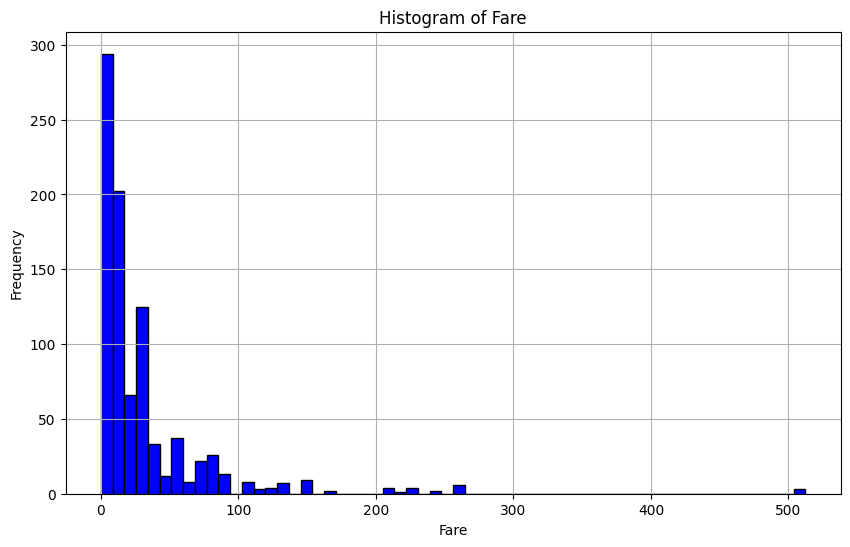

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Last_name,Title,First_name,Familiy_count,Title_type,Age_cat,Fare_cat
0,1,0,3,1,22.0,1,0,7.2500,Braund,Mr.,Owen Harris,1,0,3,1
1,2,1,1,2,38.0,1,0,71.2833,Cumings,Mrs.,John Bradley (Florence Briggs Thayer),1,1,3,2
2,3,1,3,2,26.0,0,0,7.9250,Heikkinen,Miss.,Laina,0,2,3,1
3,4,1,1,2,35.0,1,0,53.1000,Futrelle,Mrs.,Jacques Heath (Lily May Peel),1,1,3,2
4,5,0,3,1,35.0,0,0,8.0500,Allen,Mr.,William Henry,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,Montvila,Rev.,Juozas,0,5,3,1
887,888,1,1,2,19.0,0,0,30.0000,Graham,Miss.,Margaret Edith,0,2,3,1
888,889,0,3,2,28.0,1,2,23.4500,Johnston,Miss.,"Catherine Helen ""Carrie""",3,2,3,1
889,890,1,1,1,26.0,0,0,30.0000,Behr,Mr.,Karl Howell,0,0,3,1


In [157]:
# Making categorical values
train_data['Title'] = train_data['Title'].astype('category')
train_data['Title_type'] = pd.factorize(train_data['Title'])[0]
train_data['Sex'] = train_data['Sex'].replace({'male': 1, 'female': 2})

test_data['Title'] = test_data['Title'].astype('category')
test_data['Title_type'] = pd.factorize(test_data['Title'])[0]
test_data['Sex'] = test_data['Sex'].replace({'male': 1, 'female': 2})

# Define bins and labels for the age categories
bins = [-1, 2, 16, 39, 59, 150]
#labels = ['Baby', 'Children', 'Young Adults', 'Old Adults', 'Elderly']
labels = [1,2,3,4,5]

# Create 'Age_cat' column
train_data['Age_cat'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data['Age_cat'] = pd.cut(test_data['Age'], bins=bins, labels=labels)

def show_fares(df):
    # Plotting the histogram
    plt.figure(figsize=(10, 6))  # Sets the figure size
    plt.hist(df['Fare'], bins=60, color='blue', edgecolor='black')  # You can adjust the number of bins and color
    plt.title('Histogram of Fare')
    plt.xlabel('Fare')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

show_fares(train_data)

# Create 'Fare_cat' column
bins = [-1, 35, 150, 1000]
#labels = ['Low', 'Medium', 'High']
labels = [1,2,3]
train_data['Fare_cat'] = pd.cut(train_data['Fare'], bins=bins, labels=labels)
test_data['Fare_cat'] = pd.cut(test_data['Fare'], bins=bins, labels=labels)

train_data

In [181]:
# Create model for TESTING
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = ["Sex", "Fare_cat", "Familiy_count", "Age_cat"]

X = train_data[features]
y = train_data.Survived

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [182]:
# FINGING BEST FIT
n_estimators_min = 1000
n_estimators_max = 1000
n_estimators_step = 50

max_depth_min = 5
max_depth_max = 5
max_depth_step = 3

n_estimators_range = range(n_estimators_min, n_estimators_max + 1, n_estimators_step)
max_depth_range = range(max_depth_min, max_depth_max + 1, max_depth_step)


best_accuracy = 0
best_params = {}

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        # Create and train the RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=1)
        rf.fit(X_train, y_train)
        
        # Predict on the test data and calculate accuracy
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Update best_params if current accuracy is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            print(f"New best accuracy: {best_accuracy:.2f} with n_estimators={n_estimators} and max_depth={str(max_depth)}")

    print(f"Currently at: {n_estimators}/{n_estimators_max}")

# Print the best parameters and the corresponding accuracy
print(f"Best accuracy: {best_accuracy:.2f}")
print(f"Best parameters: n_estimators={best_params['n_estimators']}, max_depth={str(best_params['max_depth'])}")


New best accuracy: 0.80 with n_estimators=1000 and max_depth=5
Currently at: 1000/1000
Best accuracy: 0.80
Best parameters: n_estimators=1000, max_depth=5


In [183]:
# ASSINGMENT
rf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

test_x = test_data[features]

predictions = rf.predict(test_x)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

C:\Users\PS User\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
